Title: Water jet visuliztion practice
Author: Xuchen Ying
Date: Oct. 15 2024

This data is a water jet measurement by Particle Imaging Velocimetry tech. The basics of PIV can be found here: https://en.wikipedia.org/wiki/Particle_image_velocimetry 

The PIV images were analyzed to obtain both mean flow (time-averaged) and turbulent flow. The data set ‘jet_dataset.xlsx’ contains the mean velocity data in the vertical direction (W) in a window about a few centimeters away from the nozzle (Figure 1). The velocity data is a 20 × 52 matrix, corresponding to 20 and 52 data points in the vertical (z) and horizontal (x) directions. The grid size of measurement is 0.0023 m. Hence, this measurement windows is 4.6 × 12.0 cm in size. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = '../data/jet_dataset.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure
#print(data.head())

# Assuming data is in a single column and needs to be reshaped
# Calculate the number of rows and columns based on the grid size
grid_size = 0.0023

rows, cols = data.shape

x_labels = np.arange(0, rows*grid_size, grid_size)
y_labels = np.arange(0, cols*grid_size, grid_size) 



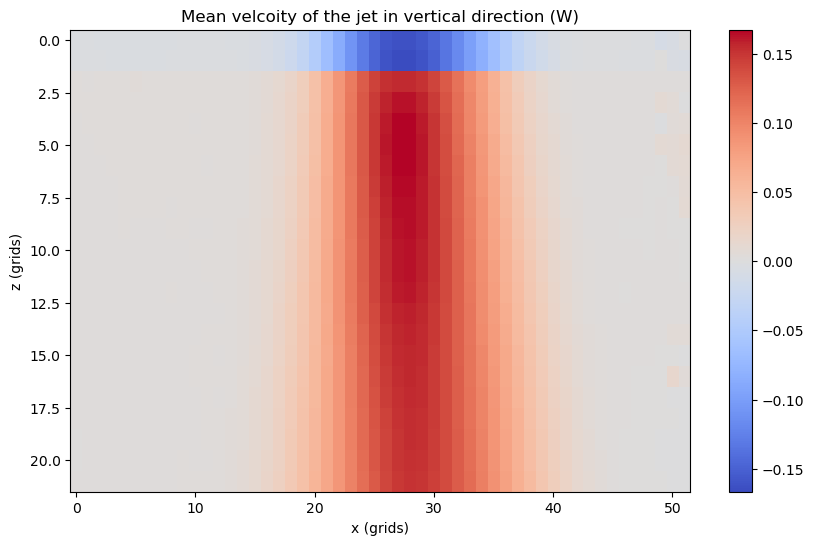

In [3]:
# Create a color map using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Mean velcoity of the jet in vertical direction (W)')
plt.xlabel('x (grids)')
plt.ylabel('z (grids)')


plt.show()

plt.show()

Description:

This figure shows the mean velocity profile in this region (W as a function of r or x for the entire window). I used a contour plot, as it helps the reader easily understand the physical position and the size and direction of each loc velocity.


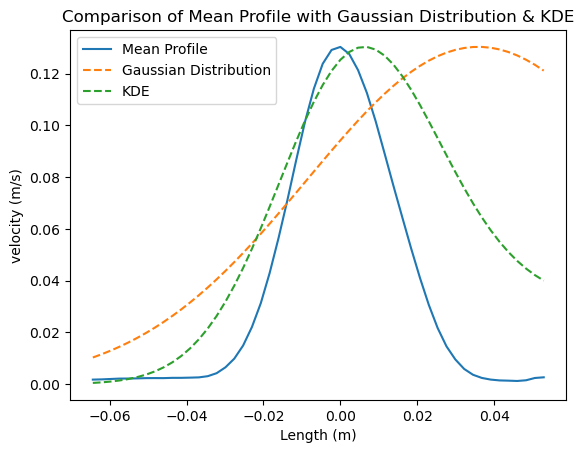

In [28]:
from scipy.stats import norm
from scipy.stats import gaussian_kde


mean_y = data.mean(axis=0)


mean = np.mean(mean_y)
std_dev = np.std(mean_y)

mid_x = np.argmax(mean_y)
mid_y = y_labels[mid_x]

r_labels = y_labels - mid_y

# Generate a Gaussian distribution using the calculated mean and standard deviation
gaussian_y = norm.pdf(r_labels, mean, std_dev)

# Normalize the Gaussian distribution to match the scale of the mean profile
gaussian_y = gaussian_y / np.max(gaussian_y) * np.max(mean_y)



# Create a kernel density estimate of the mean profile
kde = gaussian_kde(mean_y)

# Evaluate the KDE on a set of points
kde_y = kde(r_labels)

# Normalize the KDE to match the scale of the mean profile
kde_y = kde_y / np.max(kde_y) * np.max(mean_y)




plt.plot(y_labels-mid_y, mean_y, label='Mean Profile')
plt.plot(y_labels-mid_y, gaussian_y, label='Gaussian Distribution', linestyle='--')
plt.plot(y_labels-mid_y, kde_y, label='KDE', linestyle='--')

plt.title('Comparison of Mean Profile with Gaussian Distribution & KDE')
plt.xlabel('Length (m)')
plt.ylabel('velocity (m/s)')
plt.legend()
plt.show()



Description:

This figure compares the measurement data with both the Gaussian distribution and the KDE distribution. My aim is to show the reader the error between the theoretical data and the experimentally measured data.